In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,classification_report

from tensorflow import keras
from keras import layers
from keras.utils.vis_utils import plot_model


%matplotlib inline

## Data Import

In [2]:
data=pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data=data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


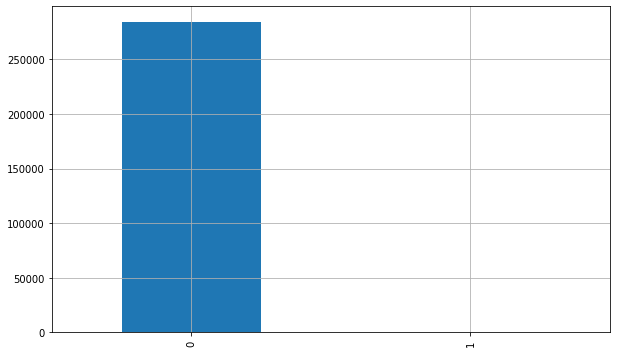

0    284315
1       492
Name: Class, dtype: int64

In [5]:
data['Class'].value_counts().plot(kind='bar',figsize=(10,6),grid='-')
plt.show()
data['Class'].value_counts()

In [6]:
print('Ratio of Class 1 to Class 2 :',492/284315*100)

Ratio of Class 1 to Class 2 : 0.17304750013189596


In [7]:
# Heavily imbalanced

## Data Preparation

In [8]:
df_negative = data[(data['Class']==0)]
df_positive = data[(data['Class']==1)]


# upsample minority classes
df_negative_upsampled = resample(df_negative, 
                                 replace=True,    
                                 n_samples= 284315, 
                                 random_state=42)  

df_positive_upsampled = resample(df_positive, 
                                 replace=True,    
                                 n_samples= 284315, 
                                 random_state=42)  


# Concatenate the upsampled dataframes with the neutral dataframe
df_final = pd.concat([df_negative_upsampled,df_positive_upsampled])

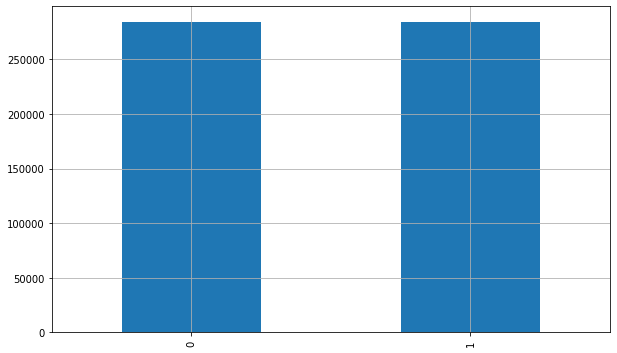

0    284315
1    284315
Name: Class, dtype: int64

In [9]:
df_final['Class'].value_counts().plot(kind='bar',figsize=(10,6),grid='-')
plt.show()
df_final['Class'].value_counts()

In [18]:
x=df_final.drop(['Class'],axis=1)
y=df_final['Class']

## Splitting Data

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [20]:
x_train.shape

(454904, 29)

## Machine Learning Models
### Results

In [36]:
model=LogisticRegression(max_iter=500)
model.fit(x_train\,y_train)
y_preds=model.predict(x_test)
print('Accuracy Score : ',accuracy_score(y_preds,y_test))
cr=classification_report(y_preds,y_test)
print(cr)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy Score :  0.9489298841074161
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     60118
           1       0.92      0.98      0.95     53608

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [37]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
print('Accuracy Score : ',accuracy_score(y_preds,y_test))
cr=classification_report(y_preds,y_test)
print(cr)

Accuracy Score :  0.9999912069359689
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56931
           1       1.00      1.00      1.00     56795

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [38]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
print('Accuracy Score : ',accuracy_score(y_preds,y_test))
cr=classification_report(y_preds,y_test)
print(cr)

Accuracy Score :  0.9998681040395336
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56917
           1       1.00      1.00      1.00     56809

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



## Deep Learning Model

In [46]:
inputs=keras.Input(shape=(x_train.shape[1],),name='Input Layer')
x = layers.Dense(64,activation='relu',name='Fully_Connected_1')(inputs)
x = layers.Dense(64,activation='relu',name='Fully_Connected_2')(x)
outputs=layers.Dense(1,activation='sigmoid',name='Output_Layer')(x)
baseline_model=keras.Model(inputs=inputs,outputs=outputs,name='BaselineModel')

### Model arhitechture

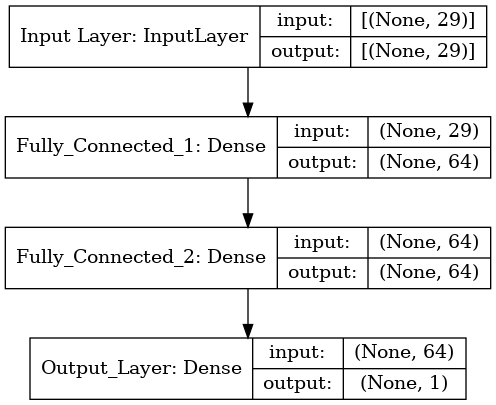

In [49]:
plot_model(baseline_model,show_shapes=True,show_layer_names=True)

In [50]:
baseline_model.summary()


Model: "BaselineModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input Layer (InputLayer)     [(None, 29)]              0         
_________________________________________________________________
Fully_Connected_1 (Dense)    (None, 64)                1920      
_________________________________________________________________
Fully_Connected_2 (Dense)    (None, 64)                4160      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 65        
Total params: 6,145
Trainable params: 6,145
Non-trainable params: 0
_________________________________________________________________


In [51]:
baseline_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [53]:
history=baseline_model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    steps_per_epoch=100,
    verbose=1,
    validation_data=(x_test,y_test)
)

2022-04-08 07:21:01.636682: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
100/100 [==============================] - 7s 56ms/step - loss: 0.4720 - accuracy: 0.8147 - val_loss: 0.2774 - val_accuracy: 0.9226
Epoch 2/10
100/100 [==============================] - 5s 54ms/step - loss: 0.3177 - accuracy: 0.9197 - val_loss: 0.4025 - val_accuracy: 0.8970
Epoch 3/10
100/100 [==============================] - 5s 50ms/step - loss: 0.2389 - accuracy: 0.9294 - val_loss: 0.1236 - val_accuracy: 0.9523
Epoch 4/10
100/100 [==============================] - 5s 54ms/step - loss: 0.2619 - accuracy: 0.9409 - val_loss: 0.1275 - val_accuracy: 0.9527
Epoch 5/10
100/100 [==============================] - 6s 56ms/step - loss: 0.3094 - accuracy: 0.9378 - val_loss: 0.1651 - val_accuracy: 0.9530
Epoch 6/10
100/100 [==============================] - 5s 54ms/step - loss: 0.1601 - accuracy: 0.9484 - val_loss: 0.2848 - val_accuracy: 0.9304
Epoch 7/10
100/100 [==============================] - 5s 54ms/step - loss: 0.1696 - accuracy: 0.9525 - val_loss: 0.1039 - val_accuracy: 0.9597

In [54]:
def get_plot(trained_model,no_epochs):
    accuracy=trained_model.history['accuracy']
    loss=trained_model.history['loss']
    val_accuracy=trained_model.history['val_accuracy']
    val_loss=trained_model.history['val_loss']
    epochs=[i for i in range(1,no_epochs+1)]

    plt.figure(figsize=(12,8))
    plt.plot(epochs,accuracy,'r',label='Training')
    plt.plot(epochs,val_accuracy,'--',label='Validation')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy',fontsize=15)
    plt.grid()
    plt.show()

    plt.figure(figsize=(12,8))
    plt.plot(epochs,loss,'r',label='Training')
    plt.plot(epochs,val_loss,'--',label='Validation')
    plt.legend()
    plt.title('Loss',fontsize=15)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

### Results

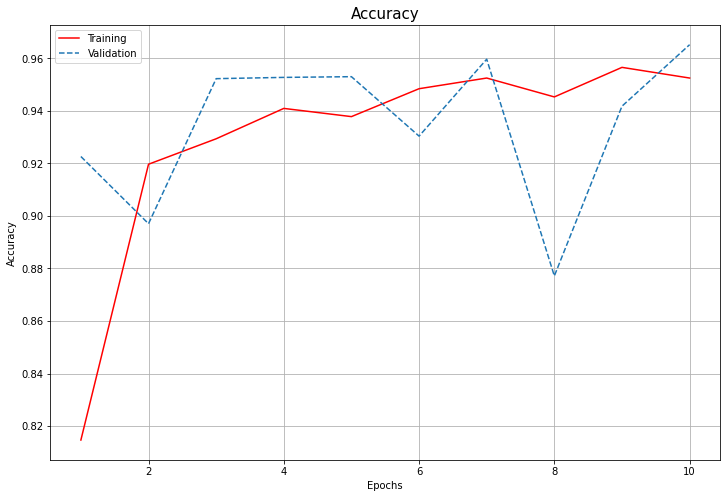

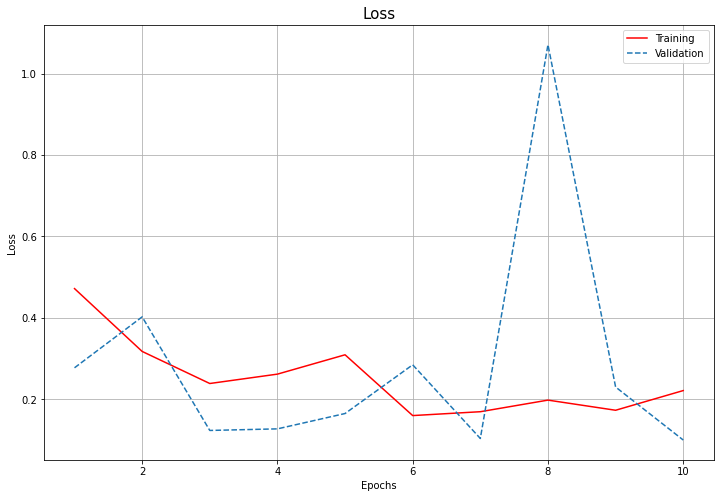

In [55]:
get_plot(history,10)